In [1]:
import pandas as pd
import holidays
import seaborn as sns
from bdateutil import isbday
import matplotlib.pyplot as plt
#datasets is taking from:
#https://www.kaggle.com/PromptCloudHQ/imdb-data/data

#1- getting data and arranging it

movies_df = pd.read_csv("D:\\NayaMLCourse\\IMDB-Movie-Data.csv", index_col="Title")
#print entire table
print("movie_imdb table:",movies_df)
#lets see the number of coloumn and rows
print("movie_imdb table info:",movies_df.info())
#lets see if on our data we have null
print("number of null items:",movies_df.isnull().sum())
#lets update the data to have NAN instead of null, on the same dataframe
movies_df.dropna(inplace=True)
movies_df.info()
print("number of null items again:",movies_df.isnull().sum())  #now it is updated
movies_df.rename(columns={"Runtime (Minutes)":"Duration", "Revenue (Millions)":"Revenue"},inplace=True)  #changing the coloumn names
print("full table columns:",movies_df.columns)
print("Rating:",movies_df["Rating"])
#create new dataframe for rating abobe 8
new_df=movies_df[movies_df["Rating"]>8]
print("new Rating datafrmae:",new_df)
#lets create new categories, if rating above 9- excelent, if 6-9 good, bellow - bad , lets group them according to it-- lets try apply with a fuction
def rate_category(rate):
    if rate>=9:
        return "Excellent"
    if 9>rate>=6:
        return "Good"
    if rate<6:
        return "Poor"

movies_df["Category_Rate"]= movies_df["Rating"].apply(rate_category)
#i need to do her groupby then i will get 3 groupd according to the category
print("adding category:",movies_df["Category_Rate"])


movie_imdb table:                                          Rank                       Genre  \
Title                                                                       
Guardians of the Galaxy                     1     Action,Adventure,Sci-Fi   
Prometheus                                  2    Adventure,Mystery,Sci-Fi   
Split                                       3             Horror,Thriller   
Sing                                        4     Animation,Comedy,Family   
Suicide Squad                               5    Action,Adventure,Fantasy   
The Great Wall                              6    Action,Adventure,Fantasy   
La La Land                                  7          Comedy,Drama,Music   
Mindhorn                                    8                      Comedy   
The Lost City of Z                          9  Action,Adventure,Biography   
Passengers                                 10     Adventure,Drama,Romance   
Fantastic Beasts and Where to Find Them    11    Adventure

In [2]:
#2-data enrichment
###new data frame
df_encrichment=pd.read_csv("D:\\NayaMLCourse\\tmdb-movies.csv")

#cleanup dataframe
df_zero_budget=df_encrichment.groupby('budget').count()['id']
print("zero:",df_zero_budget.head(2))  #5696 are for zero budget

#duplications

df_encrichment.drop_duplicates(inplace=True)
#nullable
print("null sum: before",df_encrichment.isnull().sum())

df_encrichment.query('runtime!=0',inplace=True)

df_full_movieinfo=pd.merge(movies_df,df_encrichment,on='Title',how='inner') 


#remove coloumn duplication
drop_col=['director','runtime','revenue']
df_full_movieinfo.drop(columns=drop_col,inplace=True)
#df_encrichment.dropna(subset=drop_col,how='any',inplace=True)

#getting new coloumn - US Holiday and working day acccording to full release date of the moview
us_holidays = holidays.UnitedStates()

def us_holiday_update(date):
    return us_holidays.get(date)

def is_business_day(date):
    return isbday(date)
def is_profit(data):
    return data['budget']-data['revenue']


df_full_movieinfo["US_Holiday"]=df_full_movieinfo['release_date'].apply(us_holiday_update)
df_full_movieinfo["IS_business_Day"]=df_full_movieinfo['release_date'].apply(is_business_day)


zero: budget
0    5696
1       4
Name: id, dtype: int64
null sum: before id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
Title                      0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


average duration in minutes: 115.29657228017884


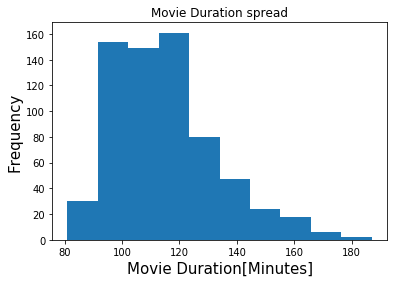

                                           Title  Duration
0                        Guardians of the Galaxy       121
1                                     Prometheus       124
2                                     Passengers       116
3                                   Interstellar       169
4                                 Doctor Strange       115
5                          The Magnificent Seven       132
6    Pirates of the Caribbean: On Stranger Tides       136
7                                   Mother's Day       118
8                                      John Wick       101
9                                The Dark Knight       152
10                          Fifty Shades of Grey       125
11                                  The Prestige       130
12                  Kingsman: The Secret Service       129
13                            Mad Max: Fury Road       120
14      Pirates of the Caribbean: At World's End       169
15                                  The Avengers       1

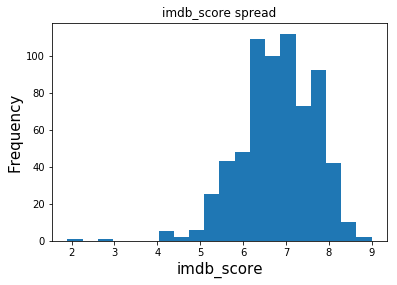

In [3]:
#3- lets investigate the data
print("average duration in minutes:",df_full_movieinfo['Duration'].mean())  #we can see that the mean is aroudn120minutes
# sort the DataFrame by duration to find the shortest and longest
df_full_movieinfo.sort_values('Duration')

# create a histogram of duration, remeber the mean is 120 minutes

df_full_movieinfo['Duration'].plot(kind='hist', bins=10)
plt.xlabel("Movie Duration[Minutes]", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.title("Movie Duration spread")
plt.show()


small_df = df_full_movieinfo[['Title', 'Duration']]
run_time = small_df['Duration']
print(small_df)
print("===============================================")
print("Longest Duration in minutes")
print(run_time.max())
print("Shortest Duration in minutes")
print(run_time.min())

popularity_df = df_full_movieinfo[['Title', 'popularity']]
run_df = popularity_df['popularity']
print(popularity_df)
print("===============================================")
print("max viewers in mil")
print(run_df.max())
print("less popularityinmil")
print(run_df.min())

#lets see the score
print("Some imdb_score statistics\n")
print(df_full_movieinfo['Rating'].describe())
print("\nThe median of the imdb_score is: ", df_full_movieinfo['Rating'].median(axis = 0))
df_full_movieinfo['Rating'].plot(kind='hist', bins=20)
plt.xlabel("imdb_score", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.title("imdb_score spread")
plt.show()


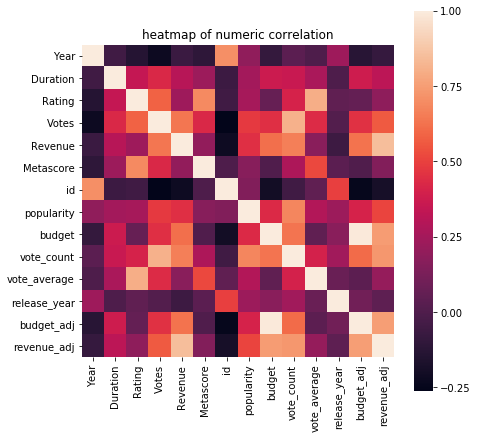

List the numerical features decendingly by their correlation with IMDB score:

vote_average: 	0.7998438644961138
Metascore: 	0.6921128011168424
Votes: 	0.5845408998343564
vote_count: 	0.4043110808908666
Duration: 	0.3456653770533383
popularity: 	0.2590869890306988
Revenue: 	0.23419039862685856
revenue_adj: 	0.18770195049816885
Year: 	-0.1337584954711577
budget: 	0.07159786897353826
budget_adj: 	0.06743520810697404
release_year: 	0.04986978722485093
id: 	-0.047414597572422904


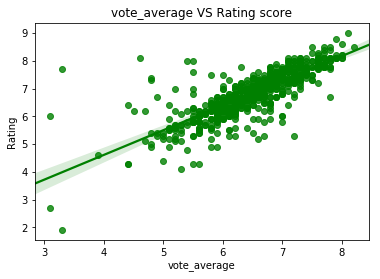

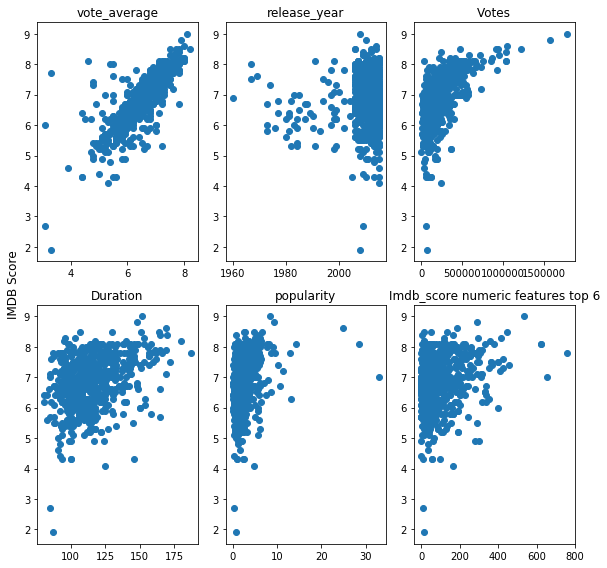

List the numerical features decendingly by their correlation with Revenue:

Revenue revenue_adj: 	0.8485852744352939
Revenue vote_count: 	0.6618713177237819
Revenue Votes: 	0.6360040043075164
Revenue budget_adj: 	0.6256197015222079
Revenue budget: 	0.6179849748599261
Revenue popularity: 	0.44907817387797505
Revenue Duration: 	0.30562802811286044
Revenue Rating: 	0.23419039862685856
Revenue id: 	-0.21405634028502496
Revenue Metascore: 	0.1966347756451915
Revenue vote_average: 	0.17574556163610625
Revenue Year: 	-0.06505148884392596
Revenue release_year: 	-0.059323786411362045


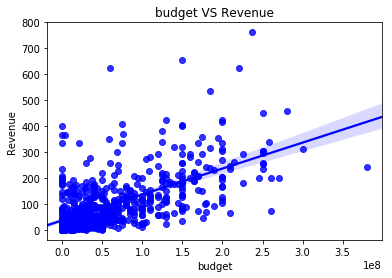

In [4]:
#4-#numeric features

corr = df_full_movieinfo.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(7, 7))
plt.title("heatmap of numeric correlation")
sns.heatmap(corr, vmax=1, square=True)
plt.show()
cor_dict = corr['Rating'].to_dict()  #lets see correlation of the rating
del cor_dict['Rating']
print("List the numerical features decendingly by their correlation with IMDB score:\n")
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*ele))
#the score ishigly corrolated withvote_average,Metascore,Votes,Duration

#lets see the firts one higest correlation for the rating
sns.regplot(x = 'vote_average', y = 'Rating', data = df_full_movieinfo, color = 'Green')
plt.title("vote_average VS Rating score")
plt.show()  #very similer to linear- like a line, why it isnt linear line, should it be the same? answer:no, 
#according to imdb site the rating isnot the exact vote rating , but it is weighted with critics


#lets see the firts one higest correlation for the rating
#sns.regplot(x = 'vote_average', y = 'Rating', data = df_full_movieinfo, color = 'Green')
#plt.title("vote_average VS Rating score")
#plt.show()  #very similer to linear- like a line


#now lets see all of them:numeric  #talh- ihow to seeactor\producer and the revenue ofhes moviews over years!!!!!!!!!



f, axarr = plt.subplots(2, 3, figsize=(8, 8))
score = df_full_movieinfo.Rating.values
axarr[0, 0].scatter(df_full_movieinfo.vote_average.values, score)
axarr[0, 0].set_title('vote_average')
axarr[0, 1].scatter(df_full_movieinfo.release_year.values, score)
axarr[0, 1].set_title('release_year')
axarr[0, 2].scatter(df_full_movieinfo.Votes.values, score)
axarr[0, 2].set_title('Votes')
axarr[1, 0].scatter(df_full_movieinfo.Duration.values, score)
axarr[1, 0].set_title('Duration')
axarr[1, 1].scatter(df_full_movieinfo.popularity.values, score)
axarr[1, 1].set_title('popularity')
axarr[1, 2].scatter(df_full_movieinfo.Revenue.values, score)
axarr[1, 2].set_title('Revenue')

f.text(-0.01, 0.5, 'IMDB Score', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.title("Imdb_score numeric features top 6")
plt.show()


#now lets see the revenue and the way its effecting if any

cor_dict1 = corr['Revenue'].to_dict()  #lets see correlation of the revenue
del cor_dict1['Revenue']
print("List the numerical features decendingly by their correlation with Revenue:\n")
for ele in sorted(cor_dict1.items(), key = lambda x: -abs(x[1])):
    print("Revenue {0}: \t{1}".format(*ele))

#lets see the firts one higest correlation for the rating
sns.regplot(x = 'budget', y = 'Revenue', data = df_full_movieinfo, color = 'Blue')
plt.title("budget VS Revenue")
plt.show()  #very similer to linear- like a line





['Title' 'Genre' 'Description' 'Director' 'Actors' 'Category_Rate'
 'imdb_id' 'cast' 'homepage' 'tagline' 'keywords' 'overview' 'genres'
 'production_companies' 'release_date' 'US_Holiday']


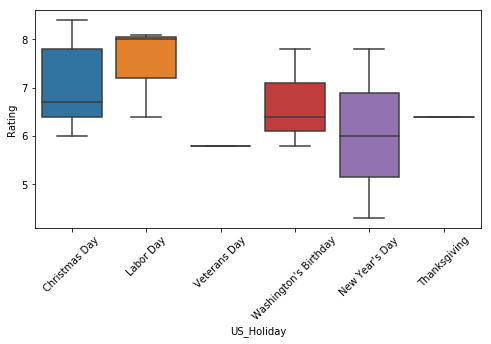

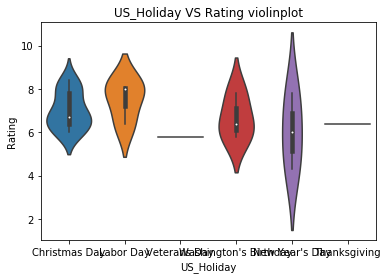

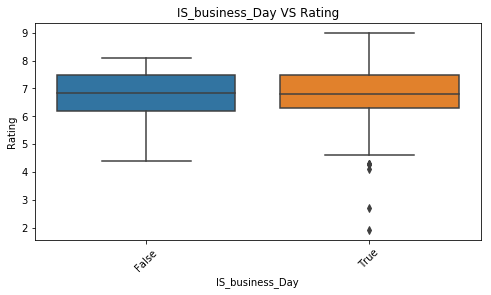

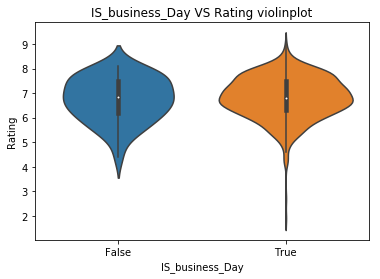

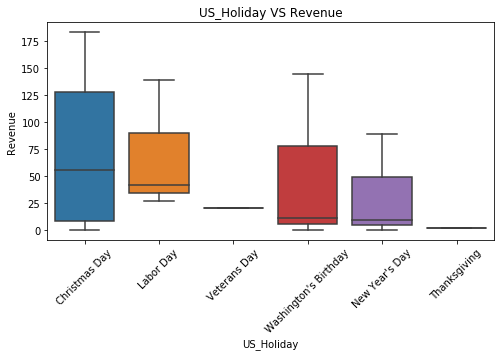

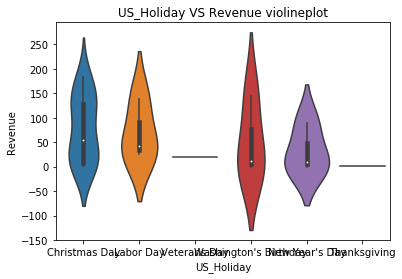

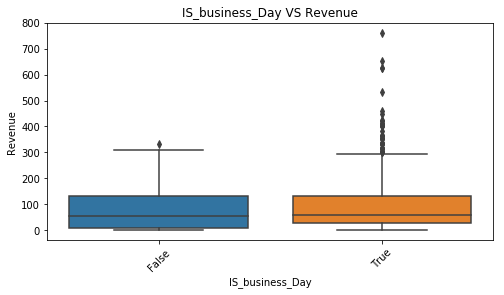

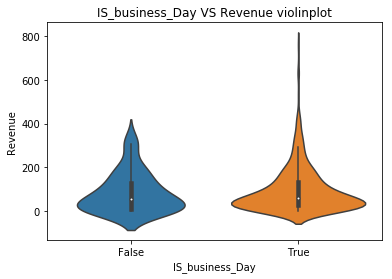

In [5]:
#5-#now lets see Categorical Features
print(df_full_movieinfo.select_dtypes(include=['object']).columns.values)

plt.figure(figsize = (8, 4))  #lets see if we have correlation to use_holiday and working day
sns.boxplot(x = 'US_Holiday', y = 'Rating',  data = df_full_movieinfo)
xt = plt.xticks(rotation=45)
plt.show()
plt.title("US_Holiday VS Rating" )
sns.violinplot('US_Holiday', 'Rating', data = df_full_movieinfo)
plt.title("US_Holiday VS Rating violinplot" )
plt.show()

plt.figure(figsize = (8, 4))  #lets see if we have correlation to  working day
sns.boxplot(x = 'IS_business_Day', y = 'Rating',  data = df_full_movieinfo)
xt = plt.xticks(rotation=45)
plt.title("IS_business_Day VS Rating")
plt.show()
sns.violinplot('IS_business_Day', 'Rating', data = df_full_movieinfo)
plt.title("IS_business_Day VS Rating violinplot")
plt.show()

plt.figure(figsize = (8, 4))  #lets see if we have correlation to use_holiday and working day
sns.boxplot(x = 'US_Holiday', y = 'Revenue',  data = df_full_movieinfo)
xt = plt.xticks(rotation=45)
plt.title("US_Holiday VS Revenue")
plt.show()
sns.violinplot('US_Holiday', 'Revenue', data = df_full_movieinfo)
plt.title("US_Holiday VS Revenue violineplot")
plt.show()

plt.figure(figsize = (8, 4))  #lets see if we have correlation to  working day

sns.boxplot(x = 'IS_business_Day', y = 'Revenue',  data = df_full_movieinfo)
xt = plt.xticks(rotation=45)
plt.title("IS_business_Day VS Revenue")
plt.show()
sns.violinplot('IS_business_Day', 'Revenue', data = df_full_movieinfo)
plt.title("IS_business_Day VS Revenue violinplot")
plt.show()



results:                       Revenue
Director                     
Joss Whedon           1705.55
Christopher Nolan     1515.09
Jon Favreau           1389.60
Michael Bay           1368.50
Francis Lawrence      1299.81
David Yates           1269.90
Tim Burton            1135.16
Peter Jackson          860.45
Ridley Scott           824.28
Chris Buck             801.48
James Cameron          760.51
J.J. Abrams            746.82
Gore Verbinski         732.43
Colin Trevorrow        652.18
Guy Ritchie            650.30
Pete Docter            649.43
Zack Snyder            645.49
Kenneth Branagh        633.87
Steven Spielberg       626.99
Pierre Coffin          619.55
Phil Lord              587.83
Louis Leterrier        578.60
Bill Condon            573.58
Paul Feig              567.82
David Fincher          560.77
Sam Mendes             527.31
Brad Bird              509.22
Marc Webb              497.27
Jonathan Liebesman     465.38
Brett Ratner           452.34
...                       ...
S

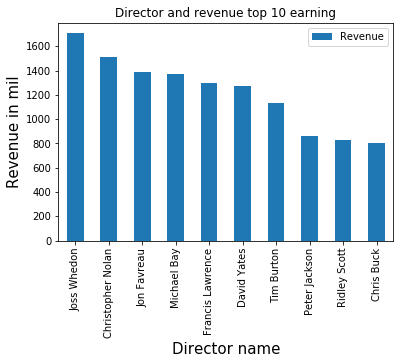

In [6]:
#6-last but not least,lets see the revenuw summ ofthe top 10 earning directors
new_df_Director=df_full_movieinfo[['Revenue','Director']].groupby('Director').sum()
print("results:",new_df_Director.sort_values(by='Revenue', ascending=False))
top_new_df_Director=new_df_Director.sort_values(by='Revenue', ascending=False).head(10)
top_new_df_Director.plot(kind="bar", title="Director and revenue top 10 earning")
plt.xlabel("Director name", fontsize=15)
plt.ylabel("Revenue in mil",fontsize=15)
plt.show()